## MONTE CARLO

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


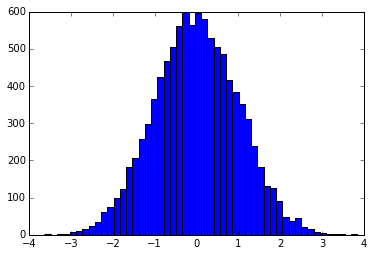

In [2]:
#GENERATE NORMALS USING SUMS OF RANDOM VARIABLES
m = 10000
z = zeros(m)
for j in range(m):
    u = random.uniform(size=12)
    z[j] = sum(u-0.5)

fig_u = hist(z,50)

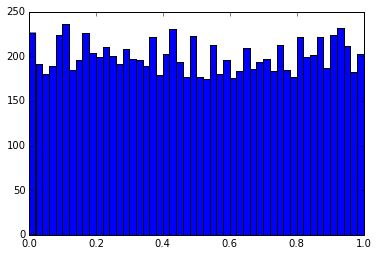

In [3]:
#GENERATE RANDOM NORMAL NUMBERS USING UNIFORM RANDOM NUMBERS USING INVERSE FUNCTION
from scipy.stats import norm
u = random.uniform(low=0.0,high=1.0,size=10000)
fig_u = hist(u,50)

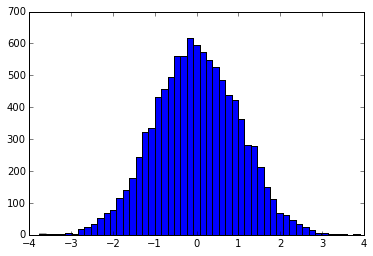

In [4]:
# Cumulative normal function
z = norm.ppf(u)
fig_z = hist(z,50)

### CORRELATED RANDOM NORMALS

In [5]:
import pandas as pd
e1 = random.uniform(size=m)
e2 = random.uniform(size=m)
rho = 0.5
z1 = e1
z2 = rho*e1 + sqrt(1-rho**2)*e2
z = pd.DataFrame(vstack((z1,z2)).T)
z.corr()

,0,1
0,1.000000,0.494839
1,0.494839,1.000000


In [6]:
corr_mat = array([[1,0.5],[0.5,1]])
ch = linalg.cholesky(corr_mat)
print(ch)
print(sqrt(1-rho**2))

[[ 1.         0.       ]
 [ 0.5        0.8660254]]
0.866025403784


In [7]:
e = pd.DataFrame(vstack((e1,e2)).T)
z = e.dot(ch.T)
z.corr()

,0,1
0,1.000000,0.494839
1,0.494839,1.000000


In [8]:
m = 100000
e1 = random.uniform(size=m)
e2 = random.uniform(size=m)
e3 = random.uniform(size=m)
corr_mat = array([[1.0,0.5,0.3],[0.5,1.0,0.2],[0.3,0.2,1.0]])
print(corr_mat)
ch = linalg.cholesky(corr_mat)
print(ch)
e = pd.DataFrame(vstack((e1,e2,e3)).T)
z = e.dot(ch.T)
z.corr()

[[ 1.   0.5  0.3]
 [ 0.5  1.   0.2]
 [ 0.3  0.2  1. ]]
[[ 1.          0.          0.        ]
 [ 0.5         0.8660254   0.        ]
 [ 0.3         0.05773503  0.95219046]]


,0,1,2
0,1.000000,0.497728,0.300063
1,0.497728,1.000000,0.198601
2,0.300063,0.198601,1.000000


In [9]:
#USING THE CANNED FUNCTION
m = 100000
mn = array([0.,0.,0.])
cv = array([[1.0,0.5,0.3],[0.5,1.0,0.2],[0.3,0.2,1.0]])
e = random.multivariate_normal(mn, cv, m)
z = pd.DataFrame(e)
z.corr()

,0,1,2
0,1.000000,0.497309,0.300163
1,0.497309,1.000000,0.202706
2,0.300163,0.202706,1.000000


### BROWNIAN MOTION

As you have seen in previous classes, the law of motion for stocks is based on a Geometric BM, i.e., 

\begin{equation}
dS(t) = \mu S(t) \; dt + \sigma S(t) \; dB(t), \quad S(0)=S_0. 
\end{equation}

This is a "stochastic" differential equation (SDE), because it describes random movement of the stock $S(t)$. As opposed to a deterministic differential equation that is only a function of time, as we saw with the bank account, whose accretion was based on the equation $dy(t) = r \;y(t) \;dt$. 

As we will see (and prove) in a later class, the solution to a SDE is not a deterministic function but a random function. In this case, the solution for time interval $h$ is known to be

\begin{equation}
S(t+h) = S(t) \exp \left[\left(\mu-\frac{1}{2}\sigma^2  \right) h + \sigma B(h)  \right]
\end{equation}

The presence of $B(h) \sim N(0,h)$ in the solution makes the function random. The presence of the exponential return makes the stock price lognormal. (Note: if r.v. $x$ is normal, then $e^x$ is lognormal.)

Re-arranging, the stock return is 

\begin{equation}
R(t+h) = \ln\left( \frac{S(t+h)}{S(t)}\right) \sim N\left[ \left(\mu-\frac{1}{2}\sigma^2  \right) h, \sigma^2 h  \right]
\end{equation}

Using properties of the lognormal distribution, the conditional mean of the stock price becomes

\begin{equation}
E[S(t+h) | S(t)] = e^{\mu h}
\end{equation}


SIMULATING GBM

It is easy to simulate a path of stock prices using a discrete form of the solution to the Geometric Brownian motion SDE. 

\begin{equation}
S(t+h) = S(t) \exp \left[\left(\mu-\frac{1}{2}\sigma^2  \right) h + \sigma \cdot e\; \sqrt{h}  \right]
\end{equation}

Note that we replaced $B(h)$ with $e \sqrt{h}$, where $e \sim N(0,1)$. Both $B(h)$ and $e \sqrt{h}$ have mean zero and variance $h$. Knowing $S(t)$, we can simulate $S(t+h)$ by drawing $e$ from a standard normal distribution. 

In [10]:
#PARAMETERS
m = 1000
n = 252
s0 = 100.0
mu = 0.10
sig = 0.20
s = zeros((m,n+1))
T = 1.0
h = T/n

#SIMULATE
s[:,0] = s0
for j in range(1,n+1):
    s[:,j] = s[:,j-1]*exp((mu-0.5*sig**2)*h + sig*sqrt(h)*randn(m))
    
print mean(s[:,n]), s0*exp(mu*T)

110.079860483 110.517091808


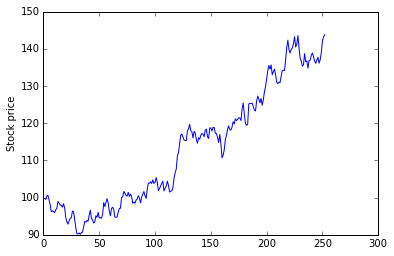

In [11]:
plot(s[0,:])
ylabel("Stock price")

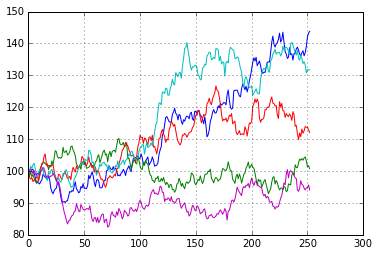

In [12]:
for j in range(5):
    plot(s[j,:])
grid()

### CHECKING PERFORMANCE

In [13]:
def stksim(s0,mu,sig,T,n,m):
    s = zeros((m,n+1))
    s[:,0] = s0
    h = T/n
    for j in range(1,n+1):
        s[:,j] = s[:,j-1]*exp((mu-0.5*sig**2)*h + sig*sqrt(h)*randn(m))
    return s
        
%timeit stksim(s0,mu,sig,T,n,100000)

1 loops, best of 3: 2.18 s per loop


In [14]:
#PRICING CALL OPTIONS
def call_price(s0,mu,sig,T,n,m,K):
    sT = stksim(s0,mu,sig,T,n,m)[:,n]
    cT = exp(-mu*T)*mean(maximum(0,sT-K))
    return cT

K = 101.
m = 10000
%timeit print call_price(s0,mu,sig,T,n,m,K)

12.4856022351
12.7081772117
12.5577250011
12.7331205651
1 loops, best of 3: 217 ms per loop


In [15]:
%time call_price(s0,mu,sig,T,n,m,K)

CPU times: user 200 ms, sys: 52 µs, total: 200 ms
Wall time: 199 ms


12.660381213080734

In [16]:
#PRICE MULTIPLE OPTIONS
def many_calls(s0,mu,sig,T,n,m,strikes):
    s = zeros((m,n+1))
    s[:,0] = s0
    h = T/n
    for j in range(1,n+1):
        s[:,j] = s[:,j-1]*exp((mu-0.5*sig**2)*h + sig*sqrt(h)*randn(m))
    for K in strikes:
        K = K*1.0
        sT = s[:,n]
        cT = exp(-mu*T)*mean(maximum(0,sT-K))
        print(K, cT)
    return cT

#RUN CODE
m = 100000
T = 2.0
n = 252*2
s0 = 100.0
mu = 0.10
sig = 0.20
strikes = range(95,106)
%time many_calls(s0,mu,sig,T,n,m,strikes)

(95.0, 24.651140327525656)
(96.0, 24.023110461634218)
(97.0, 23.404460387718064)
(98.0, 22.795631318290344)
(99.0, 22.196302042294651)
(100.0, 21.606704062996815)
(101.0, 21.02686039774165)
(102.0, 20.456708297482745)
(103.0, 19.896691162108613)
(104.0, 19.346729152442691)
(105.0, 18.806938728291154)
CPU times: user 4.86 s, sys: 35.9 ms, total: 4.9 s
Wall time: 4.89 s


18.806938728291154

In [17]:
#USE DYNAMIC COMPILED VERSION
import numba as nb

many_calls2 = nb.jit(many_calls)

strikes = range(95,106)
%time many_calls2(s0,mu,sig,T,n,m,strikes)  #Slow because it includes compilation time

(95.0, 24.771375709001571)

(96.0, 24.143256811995396)

(97.0, 23.52457317568631)

(98.0, 22.915382736847501)

(99.0, 22.315925671968504)

(100.0, 21.725980238683494)

(101.0, 21.145623754739763)

(102.0, 20.575172460619086)

(103.0, 20.015233984332756)

(104.0, 19.465631446705849)

(105.0, 18.926401076933953)

CPU times: user 5.64 s, sys: 24 ms, total: 5.67 s
Wall time: 5.66 s


/home/rick/anaconda/lib/python2.7/site-packages/numba/dataflow.py:276: RuntimeWarning: Python2 style print partially supported.  Please use Python3 style print.
  "Python3 style print.", RuntimeWarning)


18.926401076933953

In [18]:
#RUN THIS ONE MORE TIME TO USE THE PRE-COMPILED VERSION
%time many_calls2(s0,mu,sig,T,n,m,strikes)

(95.0, 24.645621859226591)

(96.0, 24.019161897494367)

(97.0, 23.4023335188106)

(98.0, 22.795036584379591)

(99.0, 22.197294212173844)

(100.0, 21.60910791216104)

(101.0, 21.030605205637482)

(102.0, 20.461965262244835)

(103.0, 19.903013458548063)

(104.0, 19.354597320477662)

(105.0, 18.816581490319205)

CPU times: user 4.7 s, sys: 36 ms, total: 4.73 s
Wall time: 4.73 s


18.816581490319205

### INTEREST-RATE PROCESSES

VASICEK PROCESS

Interest rates are mean reverting and not growing exponentially. The process often used, called the Ornstein-Uhlenbeck (OU) process is as follows:

\begin{equation}
dr(t) = k(\theta - r(t))\; dt + \sigma dB(t)
\end{equation}

It has a mean of 

\begin{equation}
E[r(t)] = r(0) e^{-kt} + \theta (1-e^{-kt})
\end{equation}

with variance

\begin{equation}
Var[r(t)] = \frac{\sigma^2}{2k} (1-e^{-2kt})
\end{equation}

We simulate it as follows:

\begin{equation}
r(t) = r(0) e^{-kt} + \theta (1-e^{-kt}) + \sigma \int_0^t e^{-k(t-s)} dB(s)
\end{equation}

Approximated by:

\begin{equation}
r(h) = r(0) e^{-kh} + \theta (1-e^{-kh}) + \sigma e^{-0.5kh} e \sqrt(h), \quad e \sim N(0,1)
\end{equation}

In [19]:
#PARAMETERS
m = 1000
n = 2520
r0 = 0.06
k = 0.5
theta = 0.06
sig = 0.05
r = zeros((m,n+1))
T = 10.0
h = T/n

#SIMULATE
r[:,0] = r0
for j in range(1,n+1):
    r[:,j] = r[:,j-1]*exp(-k*h) + theta*(1-exp(-k*h)) + sig*exp(-0.5*k*h)*sqrt(h)*randn(m)

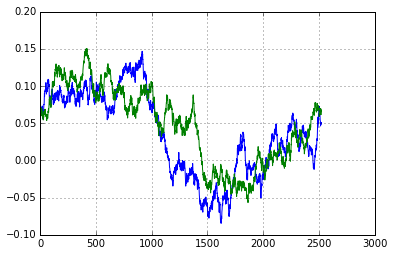

In [20]:
for j in range(2):
    plot(r[j,:])
grid()

In [21]:
print "Mean r(t) = ", mean(r[:,n]), r0*exp(-k*T)+theta*(1-exp(-k*T))
print "Variance r(t) = ",var(r[:,n]), sig**2/(2.0*k) * (1-exp(-2.0*k*T))
print "Stdev r(t) = ",std(r[:,n]), sqrt(sig**2/(2.0*k) * (1-exp(-2.0*k*T)))

Mean r(t) =  0.0596185858924 0.06
Variance r(t) =  0.00248704017123 0.00249988650018
Stdev r(t) =  0.0498702333184 0.0499988649889


COX-INGERSOLL-ROSS (1985) SQUARE-ROOT DIFFUSION

\begin{equation}
dr(t) = k(\theta - r(t))\; dt + \sigma \sqrt{r(t)} dB(t)
\end{equation}

It has a mean of 

\begin{equation}
E[r(t)] = r(0) e^{-kt} + \theta (1-e^{-kt})
\end{equation}

We simulate it as follows:

\begin{equation}
r(t) = r(0) e^{-kt} + \theta (1-e^{-kt}) + \sigma \int_0^t e^{-k(t-s)} \sqrt{r(t)} dB(s)
\end{equation}

Approximated by:

\begin{equation}
r(h) = |r(0) e^{-kh} + \theta (1-e^{-kh}) + \sigma e^{-0.5kh} e \sqrt{r(0)h}|, \quad e \sim N(0,1)
\end{equation}

Note that the absolute sign is used to ensure that the process remains positive, this has been proven to be acceptable for this process. 

In [22]:
#PARAMETERS
m = 1000
n = 2520
r0 = 0.06
k = 0.5
theta = 0.06
sig = 0.25
r = zeros((m,n+1))
T = 10.0
h = T/n

#SIMULATE
r[:,0] = r0
for j in range(1,n+1):
    r[:,j] = abs(r[:,j-1]*exp(-k*h) + theta*(1-exp(-k*h)) + sig*exp(-0.5*k*h)*sqrt(r[:,j-1]*h)*randn(m))

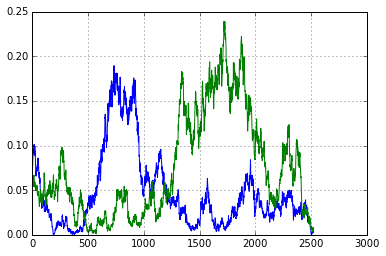

In [23]:
for j in range(2):
    plot(r[j,:])
grid()

### ESTIMATING THE VASICEK PROCESS

We can write the Vasicek process in discrete time form:

\begin{equation}
r(t+h) - r(t) = k(\theta-r(t))h + \sigma \sqrt{h} e
\end{equation}

which looks like 

\begin{equation}
y(t) = a + b r(t) + E(t)
\end{equation}

where $y(t) = r(t+h)-r(t)$, $a = k\theta h$, $b = -kh$, $E(t) = \sigma e(t) \sqrt{h}$.

We fit the data to a regression to get $a,b,Var[e(t)]$, and then solve to get

\begin{eqnarray}
k &=& -\frac{b}{h} \\
\theta &=& \frac{a}{kh} = -\frac{a}{b} \\
\sigma &=& \sqrt{\frac{1}{h} Var[e(t)]}
\end{eqnarray}

In [24]:
#GENERATE THE DATA

#PARAMETERS
m = 1000
n = 2520
r0 = 0.06
k = 0.5
theta = 0.06
sig = 0.05
r = zeros(n+1)
T = 10.0
h = T/n

#SIMULATE
r[0] = r0
for j in range(1,n+1):
    r[j] = r[j-1]*exp(-k*h) + theta*(1-exp(-k*h)) + sig*exp(-0.5*k*h)*sqrt(h)*randn()

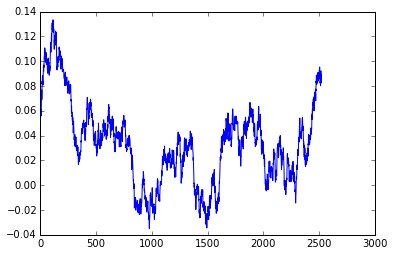

In [25]:
plot(r)

In [26]:
y = r[1:n]-r[0:n-1]
r1 = r[0:n-1]

from scipy import stats
b, a, r_value, p_value, std_err = stats.linregress(r1,y)
print "Intercept = ",a
print "slope (beta) = ",b
print "Std Error (beta) = ",std_err
print "sigma_e = ", std(y-a-b*r1)

print "k = ", -b/h
print "theta = ", -a/b
print "sigma = ", std(y-a-b*r1)/sqrt(h)

Intercept =  0.000153295274389
slope (beta) =  -0.00429806355754
Std Error (beta) =  0.00193247904771
sigma_e =  0.00322751962431
k =  1.0831120165
theta =  0.0356661255323
sigma =  0.051235285665


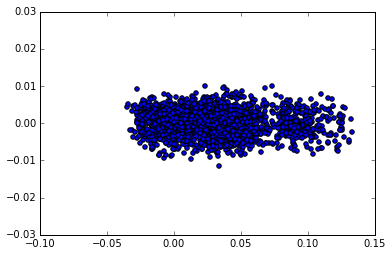

In [27]:
scatter(r1,y)

In [28]:
#USE A BETTER REGRESSION PACKAGE

import statsmodels.api as sm
r1 = sm.add_constant(r1)
res = sm.OLS(y,r1).fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     4.947
Date:                Tue, 21 Apr 2015   Prob (F-statistic):             0.0262
Time:                        11:32:23   Log-Likelihood:                 10875.
No. Observations:                2519   AIC:                        -2.175e+04
Df Residuals:                    2517   BIC:                        -2.173e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0002   9.07e-05      1.690      0.0